### 1.	What does a SavedModel contain? How do you inspect its content?


A SavedModel is a directory containing serialized signatures and the state needed to run them, including variable values and vocabularies. After exporting a SavedModel, you have a SavedModel directory that contains the following: your training graph(s), saved in SavedModel protocol buffers. external files, called assets. variables, which are saved as checkpoint files.SavedModel is a language-neutral, recoverable, hermetic serialization format. SavedModel enables higher-level systems and tools to produce, consume, and transform TensorFlow models.

You can use the SavedModel Command Line Interface (CLI) to inspect and execute a SavedModel. For example, you can use the CLI to inspect the model's SignatureDefs. The CLI enables you to quickly confirm that the input Tensor dtype and shape match the model. Moreover, if you want to test your model, you can use the CLI to do a sanity check by passing in sample inputs in various formats (for example, Python expressions) and then fetching the output.

### 2.	When should you use TF Serving? What are its main features? What are some tools you can use to deploy it?


TensorFlow Serving is a flexible, high-performance serving system for machine learning models, designed for production environments. TensorFlow Serving makes it easy to deploy new algorithms and experiments, while keeping the same server architecture and APIs. TensorFlow Serving provides out-of-the-box integration with TensorFlow models, but can be easily extended to serve other types of models and data.

To note a few features: Can serve multiple models, or multiple versions of the same model simultaneously. Exposes both gRPC as well as HTTP inference endpoints. Allows deployment of new model versions without changing any client code.

🚀 Deployment
Once the model has been saved using SavedModel format, it is pretty straight forward to get TF-Serving working, if the installation succeeded. Unlike TorchServe, serving ML models in TF-Serving is simpler as you just need to have tensorflow-model-server installed and the ML model in the specified format.
tensorflow_model_server --port=8500 --rest_api_port=8501 \
                        --model_name=simpsonsnet \
                        --model_base_path=/home/saved_models/simpsonsnet
Now, even though the command is clear and self-explanatory, a more detailed explanation on the flags used is presented:

* — port: this is the port to listen on for the gRPC API, the default value is 8500; but it's a common practice to still define this flag's value so as to always know the configuration of the deployed TF-Serving Server.
* — rest_api_port: this is the REST API port, which is set to zero by default, which means that the REST API will not be deployed/exposed unless you manually set a port. There's no default value, it just needs to be different than the gRPC port, so we will set it to 8501 (the next port).
* — model_name: this is the name of the ML model to serve, which is the one that will be exposed in the endpoint.
* — model_base_path: this is the base path where the ML model that is going to be served is placed in. Note that his is the absolute path, do not use relative paths.

Once TF-Serving has been successfully deployed, you can send a sample HTTP GET request to the Model Status REST API available at http://localhost:8501/v1/models/simpsonsnet; that returns the basic information of the served ML model.

### 3.	How do you deploy a model across multiple TF Serving instances?


For Windows 10, we will use a TensorFlow serving image.

Step 1: Install the Docker App.
Step 2: Pull the TensorFlow Serving Image. docker pull tensorflow/serving. ...
Step 3: Create and Train the Model. ...
Step 4: Save the Model. ...
Step 5: Serving the model using Tensorflow Serving. ...
Step 6: Make a REST request the model to predict.

### 4.	When should you use the gRPC API rather than the REST API to query a model served by TF Serving?


Compared to REST, gRPC provides greater performance at the expense of less flexibility. ... That is its main advantage over REST: gRPC, in most cases, is way faster and more robust, as it defines a specific set of rules each request and response should adhere

As the results show, gRPC is faster than REST in most tests. The only test that REST won, was the tests where the payload was small and several clients made a server call at the same time.

Rules. REST is a set of guidelines for designing web APIs without enforcing anything. On the other hand, gRPC enforces rules by defining a . proto file that must be adhered to by both client and server for data exchange.

gRPC (Google Remote Procedure Call): gRPC is an open-source RPC architecture designed by Google to achieve high-speed communication between microservices. ... For a specific set of use-cases, a gRPC API can serve as a more efficient alternative to a REST API (more on this later).

### 5.	What are the different ways TFLite reduces a model’s size to make it run on a mobile or embedded device?


We can reduce the size of a Tensorflow Model using the below mentioned methods:

1. Freezing: Convert the variables stored in a checkpoint file of the SavedModel into constants stored directly in the model graph. This reduces the overall size of the model.

2. Pruning: Strip unused nodes in the prediction path and the outputs of the graph, merging duplicate nodes, as well as cleaning other node ops like summary, identity, etc.

3. Constant folding: Look for any sub-graphs within the model that always evaluate to constant expressions, and replace them with those constants. Folding batch norms: Fold the multiplications introduced in batch normalization into the weight multiplications of the previous layer.

4. Quantization: Convert weights from floating point to lower precision, such as 16 or 8 bits.

### 6.	What is quantization-aware training, and why would you need it?


Quantization-aware training helps you train DNNs for lower precision INT8 deployment, without compromising on accuracy. This is achieved by modeling quantization errors during training which helps in maintaining accuracy as compared to FP16 or FP32. Quantization for deep learning is the process of approximating a neural network that uses floating-point numbers by a neural network of low bit width numbers. This dramatically reduces both the memory requirement and computational cost of using neural networks.

* why

Quantization introduces various sources of error in your algorithm, such as rounding errors, underflow or overflow, computational noise, and limit cycles. This results in numerical differences between the ideal system behavior and the computed numerical behavior.

### 7.	What are model parallelism and data parallelism? Why is the latter generally recommended?


Model parallelism is the process of splitting a model up between multiple devices or nodes (such as GPU-equipped instances) and creating an efficient pipeline to train the model across these devices to maximize GPU utilization. In Model Parallelism, one model is divided into N parts (where N is equal to the number of GPUs, in the figure above N = 4), each part of the model is placed on a separate GPU, then the batch is sequentially calculated on GPU#0, GPU#1, …, GPU#N … This is where forward propagation ends. Backward propagation is done in reverse order, starting with GPU#N and ending with GPU#0.
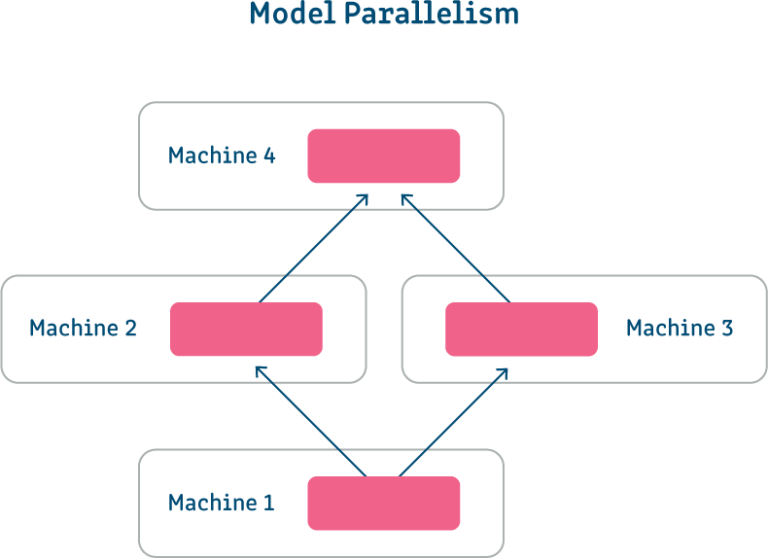


In Data Parallelism, the dataset is divided into N parts (where N is the number of GPUs, in the figure above N = 4). Then a copy of the model is placed on each GPU and trained on the corresponding data chunk. After that, gradients are calculated for each copy of the model, and then all the models exchange the gradients, which are subsequently averaged.
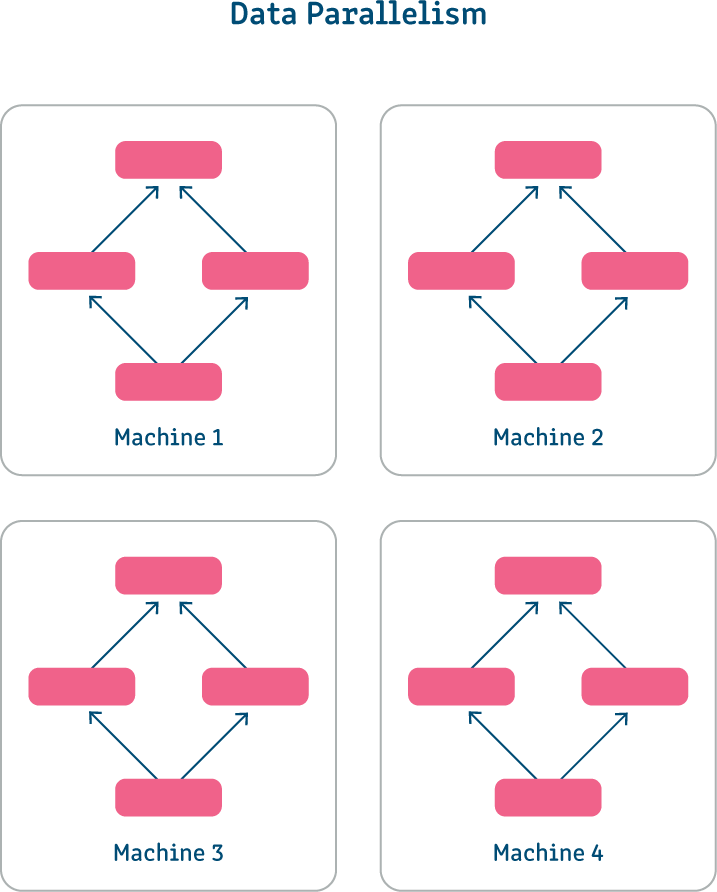

### 8.	When training a model across multiple servers, what distribution strategies can you use? How do you choose which one to use?


In this type of distributed training, data is split up and processed in parallel. Each worker node trains a copy of the model on a different batch of training data, communicating its results after computation to keep the model parameters and gradients in sync across all nodes.

As its name suggests, distributed training distributes training workloads across multiple mini-processors. These mini-processors, referred to as worker nodes, work in parallel to accelerate the training process. Their parallelism can be achieved by data parallelism or model parallelism, both of which are described below. 



Before deciding to use distributed training, it’s worth considering how many modifications are needed to switch to a distributed approach. You should also evaluate how difficult distributed training will be to implement. 

It’s important to ask yourself whether or not the move is worth it; in other words, how much will this shift speed up the training process? To answer this question, you will need to tackle the tricky issue of synchronization between workers.